<h1><center>Intro to Supervised Learning</center></h1>


So, imagine if house pricing was as easy as a house costs **50k + 100k** per bedroom, so that a 1 bedroom house costs 150k, a 2 bedroom house costs 250k etc.

How would you create a neural network that learns this relationship so that it would predict a 7 bedroom house as costing close to 750k etc.

Hint: Your network might work better if you scale the house price down. You don't have to give the answer 750...it might be better to create something that predicts the number 7.5, and then your answer is in the 'hundreds of thousands' etc.


### Keyboard Shortcuts

**Shift + Enter** -- run cell block

**M**             -- Markdown

**B**             -- New block

In [1]:
import tensorflow as tf  # library for machine learning
import numpy as np       # library for mathematics (linear algebra)
print(tf.__version__)    # prints the version of the library (here tensorflow 1.14.0)
# %matplotlib notebook     
%matplotlib inline
import matplotlib.pyplot as plt   # library for plotting
from mpl_toolkits import mplot3d  # # library for 3-D plotting

2.2.0


In [2]:
x = np.array([1.0, 2.0, 3.0, ])
y = np.array([150, 250, 350])
x1 = np.array([0., 1.])
y1 = np.array([50., 150])

x2 = np.array([3., 4., 5.,])
y2 = np.array([350., 450., 550.])

Text(0.5, 1.0, 'House price Vs Bedroom')

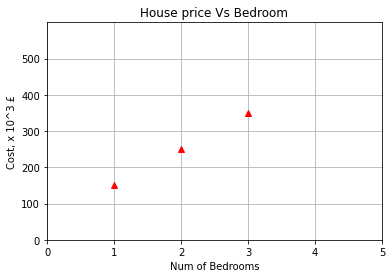

In [3]:
plt.figure()
ax = plt.axes()
ax.plot(x, y, 'r^')
ax.set_xlim([0, 5])
ax.set_ylim([0, 600])
ax.set_yticks(np.arange(0, 600, 100.0))
ax.grid()
ax.set_xlabel('Num of Bedrooms')
ax.set_ylabel('Cost, x 10^3 £')
ax.set_title('House price Vs Bedroom')

<p style="color:black;font-size:24px;">Cost of the house as a function of number of bedrooms can be expressed as </p>    

## $$ Y = 50 + 100 \times n_B$$

<h1><center>Or</center></h1>

## $$ Y = bias (intercept) + slope * n_B $$

Text(0, 0.5, 'Cost, x 10^3 £')

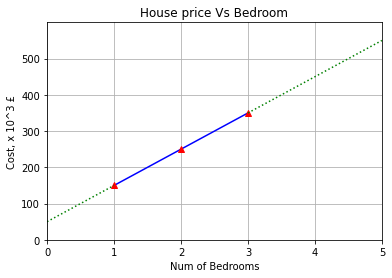

In [4]:
# %matplotlib notebook
plt.figure()
ax = plt.axes()
ax.plot(x, y, 'b')
ax.plot(x, y, 'r^')
ax.plot(x1, y1, 'g:')
ax.plot(x2, y2, 'g:')
ax.set_xlim([0, 5])
ax.set_ylim([0, 600])
ax.set_yticks(np.arange(0, 600, 100.0))
ax.grid()
ax.set_title('House price Vs Bedroom')
ax.set_xlabel('Num of Bedrooms')
ax.set_ylabel('Cost, x 10^3 £')

<p style="color:black;font-size:24px;">The mathematical model in matrix form can be expressed as</p>    

## $$ \begin{pmatrix}
	150\\
	250\\
	350
\end{pmatrix}
 = \begin{pmatrix}
	1 & 1\\
	1 & 2\\
	1& 3
\end{pmatrix} \begin{pmatrix}
	50\\
	100
\end{pmatrix} $$

## $$ Y = X \theta $$

More commonly, this is seen in literature as **$$ Y = \theta^T X$$** where $Y$ is called the *True Label* or simply *Label* (Cost history), $X$'s are the *Features* (Number of Bedrooms) and **$\theta$'s are parameters** we need to find out through some 'techniques'. (Here, it's quite easy since it's a hypothetical example)

In [15]:
xx = np.array([1.0, 2.0, 3.0, ])  # Num bedrooms
yy = np.array([40.0, 60.0, 70.0])  # Floor area
zz = np.array([150.0, 300.0, 375.0])  # Cost


In [ ]:
s = np.ones(len(xx)).reshape(-1,1)
X1 = np.hstack((xx.reshape(-1, 1), yy.reshape(-1, 1)))
X1 = np.hstack((s, X1))
# print(X1)
a = X1.transpose() @ X1
b = X1.transpose() @ zz
theta = np.linalg.solve(a, b)  # To find parameters
# print(theta)
# Z1 = X1 @ theta 

In the above, there are two feature vectors, viz., number of bedrooms and floor area and the label remains the same.
<p style="color:black;font-size:20px;">Following the above, The mathematical model in matrix form can be expressed as</p>   

## $$ \begin{pmatrix}
	150\\
	300\\
	375
\end{pmatrix}
 = \begin{pmatrix}
	1 & 1 & 40\\
	1 & 2 & 60\\
	1& 3 & 70
\end{pmatrix} \begin{pmatrix}
	\theta_1\\
	\theta_2\\
    \theta_3
\end{pmatrix} $$

The parameter vector $\theta = [\theta_1 ~\theta_2~  \theta_3]^T$ can be found out by several methods. Here we will explore **Linear Regression**. 

The formula for finding $\theta$ is 

## $$ \theta = (X^T X)^{-1}X^T Y$$

and we obtain $\theta$ as follows

## $$ \begin{pmatrix}
	150\\
	300\\
	375
\end{pmatrix}
 = \begin{pmatrix}
	1 & 1 & 40\\
	1 & 2 & 60\\
	1& 3 & 70
\end{pmatrix} \begin{pmatrix}
	-150\\
	0.0\\
    7.5
\end{pmatrix} $$



For a detailed tutorial on Linear Regression, you can refer [here](https://github.com/ashBabu/Machine-Learning/blob/master/Linear-Regression.ipynb). 

In General, the mathematical model will be,

## $$ \begin{pmatrix}
	y_1\\
	y_2\\
	...\\
    ...\\
    y_n
\end{pmatrix}=  \begin{pmatrix}
	1 & x_{11} & x_{21} \\
    1 & x_{12} & x_{22} \\
    .. & .. & .. \\
    .. & .. & .. \\
    1 & x_{1n} & x_{2n}
\end{pmatrix}\begin{pmatrix}
	\theta_1\\
	\theta_2\\
    ...\\
    ...\\
    \theta_n
\end{pmatrix} $$

### Other Mathematical models

## $$ \begin{pmatrix}
	y_1\\
	y_2\\
	...\\
    ...\\
    y_n
\end{pmatrix}=  \begin{pmatrix}
	1 & x_{11}^2 & x_{21}^2 \\
    1 & x_{12}^2 & x_{22}^2 \\
    .. & .. & .. \\
    .. & .. & .. \\
    1 & x_{1n}^2 & x_{2n}^2
\end{pmatrix}\begin{pmatrix}
	\theta_1\\
	\theta_2\\
    ...\\
    ...\\
    \theta_n
\end{pmatrix} $$

In [19]:
X2 = np.hstack(((xx**2).reshape(-1, 1), (yy**2).reshape(-1, 1)))
X2 = np.hstack((s, X2))
print(X2)
a = X2.transpose() @ X2
b = X2.transpose() @ zz
par2 = np.linalg.solve(a, b)
print(par2)
Z2 = X2 @ par2 
print(Z2, Z1)

[[1.0e+00 1.0e+00 1.6e+03]
 [1.0e+00 4.0e+00 3.6e+03]
 [1.0e+00 9.0e+00 4.9e+03]]
[19.67213115 -7.37704918  0.08606557]
[150. 300. 375.] [150. 300. 375.]


Following the 'squared' model, we get theta as

## $$ \begin{pmatrix}
	150\\
	300\\
	375
\end{pmatrix}
 = \begin{pmatrix}
	1 & 1 & 40\\
	1 & 2 & 60\\
	1& 3 & 70
\end{pmatrix} \begin{pmatrix}
	19.67\\
	-7.37\\
    0.086
\end{pmatrix} $$

In [22]:
n = 3
tx, ty = np.linspace(xx.min(), xx.max(), n), np.linspace(yy.min(), yy.max(), n)
t1 = np.ones(n).reshape(-1, 1)
X = np.vstack((tx, ty)).transpose()
X = np.hstack((t1, X**2))
# print(X)
Z = X @ par2
# print(Z)

X1 = np.vstack((tx, ty)).transpose()
X1 = np.hstack((t1, X1))
# print(X1)
# Z1 = X1 @ par1

<IPython.core.display.Javascript object>


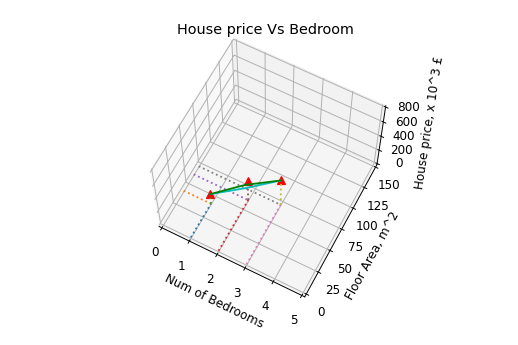

Text(0.5, 0.92, 'House price Vs Bedroom')

In [23]:
%matplotlib notebook
# %matplotlib inline
plt.figure()
ax = plt.axes(projection='3d')
ax.plot(xx, yy, zz, 'r^')
# ax.plot(xx, yy, zz, 'b')
for i in range(len(xx)):
    ax.plot([xx[i], xx[i]], [0, yy[i]], ':')
    ax.plot([0, xx[i]], [yy[i], yy[i]], ':')
    ax.plot([xx[i], xx[i]], [yy[i], yy[i]], [0, zz[i]],':')

# ax.plot(xx1, yy1, zz1, 'g:')
# ax.plot(xx2, yy2, zz2, 'g:')
# ax.plot(xx, yy, 'b:')
# ax.plot(xx1, yy1, 'g:')
ax.plot(tx, ty, Z, 'c')
ax.plot(tx, ty, Z1, 'g')
ax.set_xlim([0, 5])
ax.set_ylim([0., 150])
ax.set_zlim([0, 800])
ax.grid()

ax.set_xlabel('Num of Bedrooms')
ax.set_ylabel('Floor Area, m^2')
ax.set_zlabel('House price, x 10^3 £')
ax.set_title('House price Vs Bedroom')

So far we have dealt with simple models. As the complexity of the problem increases, linear regression will turn out to be a poor choice of mathematical model. 

## Neural Networks
![alt text](pics/nn1.png)

[![Watch the video](pics/andrew_ng_thumbnail.png)](https://www.youtube.com/watch?v=EVeqrPGfuCY)

## Using Tensorflow to Predict house prices

[Neural Network Playground](https://playground.tensorflow.org/#activation=tanh&regularization=L1&batchSize=20&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=8,8,5&seed=0.64269&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=true&xSquared=true&ySquared=true&cosX=false&sinX=true&cosY=false&sinY=true&collectStats=false&problem=regression&initZero=false&hideText=false&showTestData_hide=false)

![alt text](pics/neuralPlayground.png)

In [24]:
# The model has two hidden layers each having 4 and 6 neurons respectively
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(input_shape=[1], units=4),
                            tf.keras.layers.Dense(units=6),
                            tf.keras.layers.Dense(units=1)
                            ])
model.compile(optimizer='sgd', loss='mean_squared_error')
# model.compile(optimizer='Adam', loss='mean_squared_error')
# model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')

In [25]:
# l = 9
# ys = .5 + np.array([i for i in range(1, l)], dtype=float) # Your Code Here#
# xs = np.arange(1, l) # Your Code Here#

xs = np.array([1., 2., 3., 4.,])  # Number of Bedrooms
ys = np.array([1.5, 2.5, 3.5, 4.5])  # Cost in 10^5 £
model.fit(xs, ys, epochs=100, verbose=0)  # Find out the parameters
prediction = model.predict([7.0])  # Predict the value of a 7 bedroom house
print('The cost of a 7 bedroom house predicted by the neural network is',  prediction)  

The cost of a 7 bedroom house predicted by the neural network is [[7.6043553]]


### Fashion Data Set & Example of using callbacks

The loss might change during training. The question addressed here is 'wouldn't it be nice if the training could
be stopped when a desired value is reached?' -- i.e. 95% accuracy might be enough that after 3 epochs, why sit around
waiting for it to finish a lot more epochs

In [12]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, verbose=0, callbacks=[callbacks])



Reached 60% accuracy so cancelling training!


In [13]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 2ms/step - loss: 0.3859


0.38590624928474426

In [14]:
test_images.shape

(10000, 28, 28)

In [15]:
classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

[1.20847935e-05 1.41607131e-07 1.43463740e-06 4.65656427e-07
 2.64624714e-06 6.74743811e-03 8.62694014e-06 1.08189313e-02
 1.18468102e-04 9.82289732e-01]
9


### Convolutions and Pooling

In [16]:
# import tensorflow as tf
# print(tf.__version__)
# mnist = tf.keras.datasets.fashion_mnist
# (training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)  # *training_images.shape gives 60000, 28, 28
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
# 64 convolutions of size 3 x 3. They reduce the size of input by 2 each in x & y as can be seen 
# from the model.summary() output. These corresponds to the corners and edge columns and rows as they have no 
# neighbours to do the convolutions.

# Pooling: Here 2 x 2 which means in the 2x2 matrix, which ever is the maximum value, that is taken and the rest
# is ignored. So the overall size becomes halved in both x and y directions (total = 1/4)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

### Visualizing Convolutions

In [ ]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 5  # Change this number to see what each convolutions do. 
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)